In [1]:
# This changes the current directory to the base saga directory - make sure to run this first!
# This is necessary to be able to import the py files and use the right directories,
# while keeping all the notebooks in their own directory.

import os
import sys
import collections
from StringIO import StringIO

if 'saga_base_dir' not in locals():
    saga_base_dir = os.path.abspath('..')
if saga_base_dir not in sys.path:
    os.chdir(saga_base_dir)
    
import targeting

In [2]:
from __future__ import print_function, division

import numpy as np

from astropy import units as u
from astropy import table
from astropy.coordinates import SkyCoord
from astropy.visualization import hist as ahist

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['axes.prop_cycle'] = style.library['seaborn-deep']['axes.prop_cycle']
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.titlesize'] =  plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] =  plt.rcParams['ytick.labelsize'] = 14

This notebook investigates objects that were *not* sucessful redshifts that are bright (r<18).

# The objects from Marla 

In [7]:
#Objects brighter than 18 that pass gri but don't have spectra

bright_tab_str = """
      ZQUALITY   RA  DEC
                     1       354.14926      0.32713565
                    -1       353.99294     0.086364837
                     2       354.08257     0.060601196
                     1       247.64421       19.958888
                     1       335.94415      -3.4297140
                     1       335.97281      -3.4295662
                     2       335.82694      -3.6492167
                     1       335.80925      -3.0283747
                     1       354.14926      0.32713565
                    -1       353.99294     0.086364837
                     2       354.08257     0.060601196
                    -1       234.33588       16.249183
                     1       234.33322       16.248215
                     2       233.63394       16.559677
                     1       233.63396       16.556191
                     1       233.60915       16.528896
                     1       233.97446       16.038832
                     1       123.26675       36.256392
                    -1       122.98465       35.862910
                    -1       123.26544       36.232026
                     1       123.26814       36.244014
                     1       123.48530       36.192051
                     1       221.50404     -0.24056759
                     1       221.58943     -0.24814454
                    -1       221.51179     -0.21110648
                     1       221.58127     -0.22449246
                     1       221.49195     -0.24697855
                     1       221.89004     -0.25072021
                     2       39.574015      -1.3493834
                     1       39.777895      -1.5543484
"""[1:-1]
bright_tab = table.Table.read(bright_tab_str, format='ascii')

## the links below allow exploring of individual objects 

In [31]:
url_templ = 'http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra={}&dec={}'

for i, row in enumerate(bright_tab):
    url = url_templ.format(row['RA'], row['DEC'])
    print(i, url)

0 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=354.14926&dec=0.32713565
1 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=353.99294&dec=0.086364837
2 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=354.08257&dec=0.060601196
3 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=247.64421&dec=19.958888
4 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=335.94415&dec=-3.429714
5 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=335.97281&dec=-3.4295662
6 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=335.82694&dec=-3.6492167
7 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=335.80925&dec=-3.0283747
8 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=354.14926&dec=0.32713565
9 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=353.99294&dec=0.086364837
10 http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=354.08257&dec=0.060601

Visual inspection reveals the vast majority are "fake" objects 

## Cross-match with SAGA base catalogs 

In [119]:
saga_spectra = table.Table.read('SAGADropbox/data/saga_spectra_dirty.fits.gz')

In [124]:
scbright = SkyCoord(bright_tab['RA'], bright_tab['DEC'], unit=u.deg)
scdirty = SkyCoord(saga_spectra['RA'], saga_spectra['DEC'], unit=u.deg)

idx, d2d, _ = scbright.match_to_catalog_sky(scdirty)
saga_spectra_matches = saga_spectra[idx[d2d<1*u.arcsec]]
saga_spectra_matches

OBJID,RA,DEC,PHOTPTYPE,PHOT_SG,FLAGS,clean,SATURATED,BAD_COUNTS_ERROR,BINNED1,TOO_FEW_GOOD_DETECTIONS,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,MODELMAGERR_U,MODELMAGERR_G,MODELMAGERR_R,MODELMAGERR_I,MODELMAGERR_Z,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,DERED_U,DERED_G,DERED_R,DERED_I,DERED_Z,PETRORAD_U,PETRORAD_G,PETRORAD_R,PETRORAD_I,PETRORAD_Z,PETRORADERR_U,PETRORADERR_G,PETRORADERR_R,PETRORADERR_I,PETRORADERR_Z,DEVRAD_U,DEVRADERR_U,DEVRAD_G,DEVRADERR_G,DEVRAD_R,DEVRADERR_R,DEVRAD_I,DEVRADERR_I,DEVRAD_Z,DEVRADERR_Z,DEVAB_U,DEVAB_G,DEVAB_R,DEVAB_I,DEVAB_Z,CMODELMAG_U,CMODELMAGERR_U,CMODELMAG_G,CMODELMAGERR_G,CMODELMAG_R,CMODELMAGERR_R,CMODELMAG_I,CMODELMAGERR_I,CMODELMAG_Z,CMODELMAGERR_Z,PSFMAG_U,PSFMAGERR_U,PSFMAG_G,PSFMAGERR_G,PSFMAG_R,PSFMAGERR_R,PSFMAG_I,PSFMAGERR_I,PSFMAG_Z,PSFMAGERR_Z,FIBERMAG_U,FIBERMAGERR_U,FIBERMAG_G,FIBERMAGERR_G,FIBERMAG_R,FIBERMAGERR_R,FIBERMAG_I,FIBERMAGERR_I,FIBERMAG_Z,FIBERMAGERR_Z,FRACDEV_U,FRACDEV_G,FRACDEV_R,FRACDEV_I,FRACDEV_Z,Q_U,U_U,Q_G,U_G,Q_R,U_R,Q_I,U_I,Q_Z,U_Z,EXPAB_U,EXPRAD_U,EXPPHI_U,EXPAB_G,EXPRAD_G,EXPPHI_G,EXPAB_R,EXPRAD_R,EXPPHI_R,EXPAB_I,EXPRAD_I,EXPPHI_I,EXPAB_Z,EXPRAD_Z,EXPPHI_Z,FIBER2MAG_R,FIBER2MAGERR_R,EXPMAG_R,EXPMAGERR_R,PETROR50_R,PETROR90_R,PETROMAG_R,SB_EXP_R,SB_PETRO_R,J,JERR,H,HERR,K,KERR,SPEC_Z,SPEC_Z_ERR,SPEC_Z_WARN,PHOTOZ,PHOTOZ_ERR,W1,W1ERR,W2,W2ERR,HOST_RA,HOST_DEC,HOST_DIST,HOST_VHOST,HOST_MK,HOST_NSAID,HOST_FLAG,HOST_SAGA_NAME,RHOST_ARCM,RHOST_KPC,OBJ_NSAID,SATS,PROBABILITY_CLASS1,RESCALED_PROBABILITY_CLASS1,REMOVE,TELNAME,MASKNAME,ZQUALITY,SPEC_CLASS,SPECOBJID,SPEC_REPEAT
int64,float64,float64,int16,str40,int64,int32,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str48,float64,float64,int64,int64,float64,float64,int64,str6,str48,int64,str2,str48,str48
1237666408439874076,354.149256048,0.327135654889,3,GALAXY,439873639153920,0,0,0,268435456,281474976710656,19.0084,17.5877,17.7556,17.5112,16.6073,0.65821,0.0625852,0.11989,0.135155,0.255732,0.65821,0.0625852,0.11989,0.135155,0.255732,0.180303,0.132665,0.0962197,0.0729605,0.0517299,18.8281,17.455,17.6594,17.4382,16.5556,2.96983,258.43,106.721,106.738,106.729,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,29.6688,4.67312,29.672,5.5689,15.9071,7.38759,29.6752,2.66867,29.6683,6.69654,0.786653,0.680324,0.410557,0.541301,0.649836,19.3437,0.585916,18.0701,0.0766224,19.0124,0.169918,18.396,0.122199,17.4474,0.261338,24.3827,0.969478,22.8847,0.13416,22.4667,0.220019,22.8181,0.23614,21.9866,0.442717,24.0097,1.10144,22.7494,0.159364,22.3338,0.169423,21.9554,0.180316,21.6412,0.54159,0.0,0.599746,0.827468,0.872827,0.797219,-0.749816,-0.0140499,-0.297813,0.00354002,-0.42878,-0.00197215,2.7778,-0.142986,-1.03864,0.0148926,0.151253,59.3337,118.995,0.515816,59.3542,130.038,0.392589,59.3437,119.972,0.197627,55.2108,143.544,0.195292,59.3329,166.745,22.9446,0.212571,17.7556,0.11989,41.9779,61.174,17.7052,28.6179477918,27.8157263213,9999.

## Look at various mags to see if there are any that are v different

In [98]:
magcols = ('OBJID', 'RA', 'DEC', 'r', 'CMODELMAG_R', 'PETROMAG_R', 'FIBERMAG_R', 'PSFMAG_R')

### Look at the bright things that are *good* in SAGA - are any of them discrepent in various mags?

In [144]:
bright_good = saga_spectra[(saga_spectra['r']<18)&(saga_spectra['ZQUALITY']>=3)&(saga_spectra['REMOVE']==-1)]

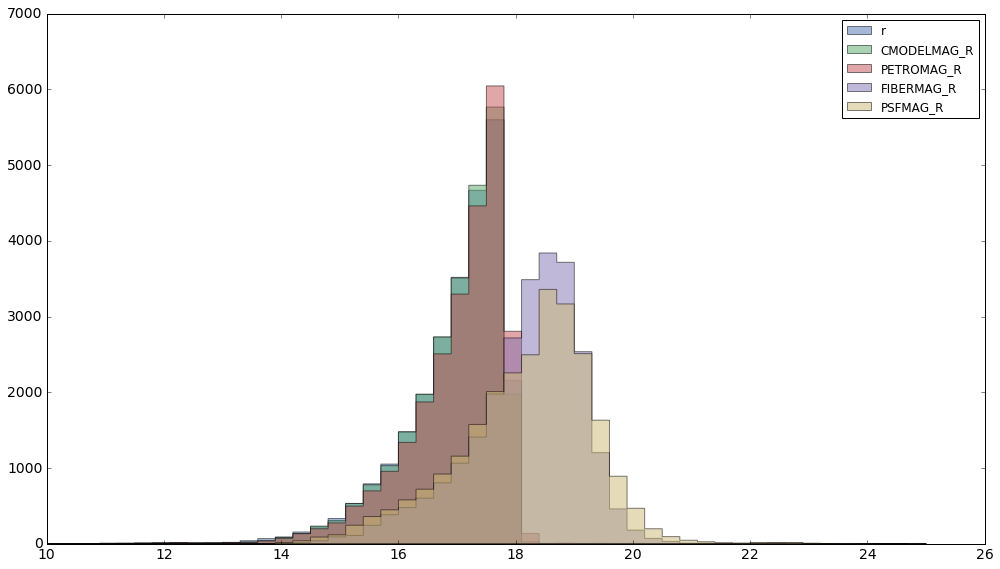

In [145]:
for col in magcols[3:]:
     plt.hist(bright_good[col],histtype='stepfilled', bins=50, range=(10, 25), label=col, alpha=.5)
plt.legend()
plt.tight_layout()

### Now what about the bright things that got no spectra? 

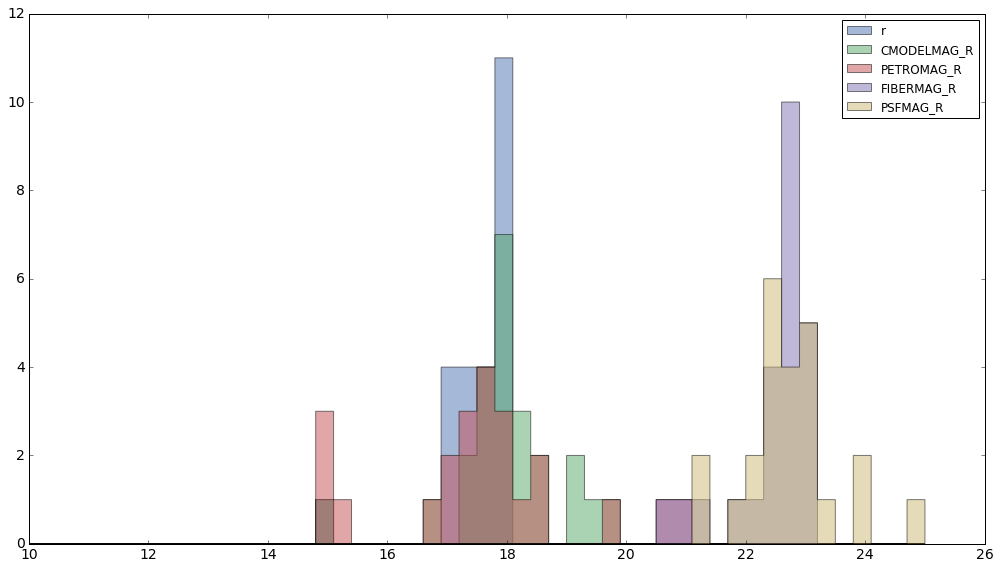

In [123]:
for col in magcols[3:]:
     plt.hist(saga_spectra_matches[col], 
              histtype='stepfilled', bins=50, range=(10, 25), label=col, alpha=.5)
plt.legend()
plt.tight_layout()

## So maybe either the fibermag or psfmag difference from regular mag is what we want? 

In [146]:
fibdiff_bright_good = bright_good['FIBERMAG_R'] - bright_good['r']
psfdiff_bright_good = bright_good['PSFMAG_R'] - bright_good['r']

fibdiff_saga_spectra_matches = saga_spectra_matches['FIBERMAG_R'] - saga_spectra_matches['r']
psfdiff_saga_spectra_matches = saga_spectra_matches['PSFMAG_R'] - saga_spectra_matches['r']

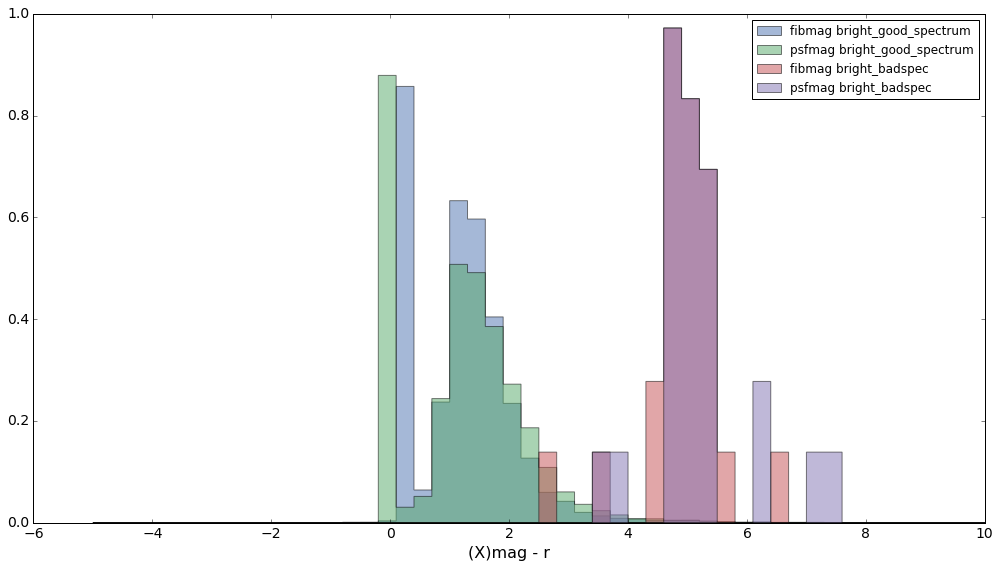

In [148]:
histkwargs = dict(histtype='stepfilled', bins=50, range=(-5, 10), normed=True, alpha=.5)

plt.hist(fibdiff_bright_good, label='fibmag bright_good_spectrum', **histkwargs)
plt.hist(psfdiff_bright_good, label='psfmag bright_good_spectrum', **histkwargs)

plt.hist(fibdiff_saga_spectra_matches, label='fibmag bright_badspec', **histkwargs)
plt.hist(psfdiff_saga_spectra_matches, label='psfmag bright_badspec', **histkwargs)

plt.xlabel('(X)mag - r')

plt.legend(loc=0)
plt.tight_layout()

Check the things that are bright_good_spectrum and have a strong offset in the above plot

In [152]:
targeting.sampled_imagelist(bright_good[fibdiff_bright_good>4], None, n=200)

'name ra dec\n0 144.738000449 0.692730437834\n1 180.676016887 1.97680307584\n2 180.720075372 1.97341672816\n3 180.650410075 2.01463800046\n4 180.700014612 2.01490982113\n5 181.120699376 1.89409150163\n6 181.160379565 1.82033909715\n7 180.609402045 1.35335292205\n8 139.49713703 52.7427116605\n9 139.007226013 52.8406351395\n10 154.231241268 58.3949131454\n11 156.291099368 58.1500435129\n12 123.241350605 36.2546358801\n13 123.272247904 36.2473829807\n14 123.260511963 36.2342399437\n15 122.502655517 36.7907934208\n16 193.84130214 58.3441767226\n17 193.766660952 58.7906790437\n18 195.531005137 58.6982005772\n19 354.350599991 0.390802769345\n20 354.195229736 0.62342377148\n21 353.502228839 0.214990397491\n22 353.235047336 0.21457743747\n23 353.914959168 1.19838788255\n24 353.722358394 1.20743944443\n25 210.708471008 49.1726221013\n26 210.220300497 49.3754537481\n27 210.207365611 49.5161574869\n28 210.198604018 48.4438973483\n29 210.664533166 50.0315031866\n30 149.587831028 32.3699118019\n31 

In [165]:
np.sum(bright_good['PETRORADERR_R']<0)/len(bright_good)

0.0054843890782308924

In [168]:
t = bright_good[fibdiff_bright_good>4]
np.sum(t['PETRORADERR_R']<0)/len(t)

0.25252525252525254

In [169]:
np.sum(saga_spectra_matches['PETRORADERR_R']<0)/len(saga_spectra_matches)

0.875

Working theory: PETRORADERR_R< 0 + fibmag offset>4 is a good selection?

In [170]:
# the things we want to *remove*, except maybe the one that looks like a gal
targeting.sampled_imagelist(saga_spectra_matches, None, 
                            names=['petrerr_r={}'.format(row['PETRORADERR_R']) for row in saga_spectra_matches])

'name ra dec\nprerr_r=-1000.0 354.149256048 0.327135654889\nprerr_r=1.98957622051 354.082573493 0.0606011959357\nprerr_r=-1000.0 247.644214855 19.9588877603\nprerr_r=-1000.0 335.944149612 -3.42971396292\nprerr_r=0.418006330729 335.972808358 -3.42956615144\nprerr_r=-1000.0 335.826943253 -3.64921666464\nprerr_r=-1000.0 335.809245892 -3.0283746526\nprerr_r=-1000.0 354.149256048 0.327135654889\nprerr_r=1.98957622051 354.082573493 0.0606011959357\nprerr_r=-1000.0 234.33322017 16.248215191\nprerr_r=-1000.0 233.633939264 16.5596769815\nprerr_r=-1000.0 233.633959197 16.5561911883\nprerr_r=-1000.0 233.609145097 16.5288963457\nprerr_r=-1000.0 233.974461564 16.0388317753\nprerr_r=-1000.0 123.266748996 36.2563919523\nprerr_r=-1000.0 123.268135605 36.2440139751\nprerr_r=-1000.0 123.485301366 36.1920509675\nprerr_r=-1000.0 221.504039494 -0.240567589235\nprerr_r=-1000.0 221.58942673 -0.248144544458\nprerr_r=-1000.0 221.581274221 -0.224492464984\nprerr_r=-1000.0 221.491946199 -0.246978545646\nprerr_r=

In [183]:
# these are bright_good things we'd be *removing*
msk = (fibdiff_bright_good>4)&(bright_good['PETRORADERR_R']<0)
t = bright_good[msk]
s = targeting.sampled_imagelist(t, None, n=len(t), 
                            names=['fibmag-r={}'.format(fd, prer) for fd, prer in 
                                   zip(fibdiff_bright_good[msk], bright_good[msk]['PETRORADERR_R'])])
len(t)/len(bright_good)

0.001958710385082462

# Extra stuff not in order with the above 

What about the real sats that have fiber mag that's very small?

In [111]:
bright_smallfib = bright_good[bright_good['FIBERMAG_R']>21]

bright_smallfib_sats = bright_smallfib[bright_smallfib['SATS']==1]
targeting.sampled_imagelist(bright_smallfib_sats,None)
bright_smallfib_sats

OBJID,RA,DEC,PHOTPTYPE,PHOT_SG,FLAGS,clean,SATURATED,BAD_COUNTS_ERROR,BINNED1,TOO_FEW_GOOD_DETECTIONS,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,MODELMAGERR_U,MODELMAGERR_G,MODELMAGERR_R,MODELMAGERR_I,MODELMAGERR_Z,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,DERED_U,DERED_G,DERED_R,DERED_I,DERED_Z,PETRORAD_U,PETRORAD_G,PETRORAD_R,PETRORAD_I,PETRORAD_Z,PETRORADERR_U,PETRORADERR_G,PETRORADERR_R,PETRORADERR_I,PETRORADERR_Z,DEVRAD_U,DEVRADERR_U,DEVRAD_G,DEVRADERR_G,DEVRAD_R,DEVRADERR_R,DEVRAD_I,DEVRADERR_I,DEVRAD_Z,DEVRADERR_Z,DEVAB_U,DEVAB_G,DEVAB_R,DEVAB_I,DEVAB_Z,CMODELMAG_U,CMODELMAGERR_U,CMODELMAG_G,CMODELMAGERR_G,CMODELMAG_R,CMODELMAGERR_R,CMODELMAG_I,CMODELMAGERR_I,CMODELMAG_Z,CMODELMAGERR_Z,PSFMAG_U,PSFMAGERR_U,PSFMAG_G,PSFMAGERR_G,PSFMAG_R,PSFMAGERR_R,PSFMAG_I,PSFMAGERR_I,PSFMAG_Z,PSFMAGERR_Z,FIBERMAG_U,FIBERMAGERR_U,FIBERMAG_G,FIBERMAGERR_G,FIBERMAG_R,FIBERMAGERR_R,FIBERMAG_I,FIBERMAGERR_I,FIBERMAG_Z,FIBERMAGERR_Z,FRACDEV_U,FRACDEV_G,FRACDEV_R,FRACDEV_I,FRACDEV_Z,Q_U,U_U,Q_G,U_G,Q_R,U_R,Q_I,U_I,Q_Z,U_Z,EXPAB_U,EXPRAD_U,EXPPHI_U,EXPAB_G,EXPRAD_G,EXPPHI_G,EXPAB_R,EXPRAD_R,EXPPHI_R,EXPAB_I,EXPRAD_I,EXPPHI_I,EXPAB_Z,EXPRAD_Z,EXPPHI_Z,FIBER2MAG_R,FIBER2MAGERR_R,EXPMAG_R,EXPMAGERR_R,PETROR50_R,PETROR90_R,PETROMAG_R,SB_EXP_R,SB_PETRO_R,J,JERR,H,HERR,K,KERR,SPEC_Z,SPEC_Z_ERR,SPEC_Z_WARN,PHOTOZ,PHOTOZ_ERR,W1,W1ERR,W2,W2ERR,HOST_RA,HOST_DEC,HOST_DIST,HOST_VHOST,HOST_MK,HOST_NSAID,HOST_FLAG,HOST_SAGA_NAME,RHOST_ARCM,RHOST_KPC,OBJ_NSAID,SATS,PROBABILITY_CLASS1,RESCALED_PROBABILITY_CLASS1,REMOVE,TELNAME,MASKNAME,ZQUALITY,SPEC_CLASS,SPECOBJID,SPEC_REPEAT
int64,float64,float64,int16,str40,int64,int32,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str48,float64,float64,int64,int64,float64,float64,int64,str6,str48,int64,str2,str48,str48
1237667228223471668,34.4564849708,6.29468048722,3,GALAXY,35255541174616,0,0,0,268435456,0,15.9043,15.4342,15.3632,15.0431,-99.0,0.0503136,0.0143256,0.0343602,0.139791,0.0875026,0.154576,0.0338745,0.0601029,0.215043,1.10988,0.333093,0.245087,0.177757,0.134788,0.0955664,21.2894,20.5442,20.7151,21.7277,22.8531,1.47284,3.07161,1.65845,1.59846,2.97041,1.3414,0.160255,0.108122,0.382837,-1000.0,0.380657,0.929018,2.27832,0.385527,0.738574,0.333412,0.655921,2.092,0.283904,70.0553,0.0999995,0.699636,0.713542,0.05,0.229759,21.7672,0.392808,20.2781,0.0388224,20.8928,0.0920885,21.983,0.450744,22.99,4.15853,21.9654,0.170399,21.4341,0.0466062,21.4402,0.0791677,22.4143,0.223826,23.1191,0.683259,21.6331,0.141289,21.1902,0.0424327,21.1542,0.0693863,21.7453,0.201541,22.0091,4.68785,0.0,0.22388,0.0,0.876136,0.0,0.0625673,-0.065178,-0.0211262,0.0176206,0.0142408,-0.00128577,0.139752,0.0723178,0.690597,3.04668,0.296689,0.523009,145.3,0.746344,1.41153,96.5558,0.779925,0.69977,142.691,0.05,0.591346,19.6805,0.673114,0.31652,44.3738,21.8465,0.0878419,20.8928,0.0920885,0.934878,1.49912,21.0499,22.1130530087,22.8991184069,9999.0,9999.0,9

In [112]:
bright_smallfib_sats[magcols]

OBJID,RA,DEC,r,CMODELMAG_R,PETROMAG_R,FIBERMAG_R,PSFMAG_R
int64,float64,float64,float32,float32,float32,float32,float32
1237667228223471668,34.4564849708,6.29468048722,15.3632,20.8928,21.0499,21.1542,21.4402
1237664337178788133,175.563531091,36.2980602831,17.0066,22.2606,22.47,21.2777,22.3974


In [82]:
scbright = SkyCoord(bright_tab['RA'], bright_tab['DEC'], unit=u.deg)
scdirty = SkyCoord(spectra['RA'], spectra['DEC'], unit=u.deg)

idx, d2d, _ = scbright.match_to_catalog_sky(scdirty)
t = spectra[idx[d2d<1*u.arcsec]]
t.sort('FIBERMAG_R')
targeting.sampled_imagelist(t, None, n=len(t), 
                            names=['fm_r={:.1f}_r={:.1f}'.format(ti['FIBERMAG_R'], ti['r']) for ti in t])
t

OBJID,RA,DEC,PHOTPTYPE,PHOT_SG,FLAGS,clean,SATURATED,BAD_COUNTS_ERROR,BINNED1,TOO_FEW_GOOD_DETECTIONS,u,g,r,i,z,u_err,g_err,r_err,i_err,z_err,MODELMAGERR_U,MODELMAGERR_G,MODELMAGERR_R,MODELMAGERR_I,MODELMAGERR_Z,EXTINCTION_U,EXTINCTION_G,EXTINCTION_R,EXTINCTION_I,EXTINCTION_Z,DERED_U,DERED_G,DERED_R,DERED_I,DERED_Z,PETRORAD_U,PETRORAD_G,PETRORAD_R,PETRORAD_I,PETRORAD_Z,PETRORADERR_U,PETRORADERR_G,PETRORADERR_R,PETRORADERR_I,PETRORADERR_Z,DEVRAD_U,DEVRADERR_U,DEVRAD_G,DEVRADERR_G,DEVRAD_R,DEVRADERR_R,DEVRAD_I,DEVRADERR_I,DEVRAD_Z,DEVRADERR_Z,DEVAB_U,DEVAB_G,DEVAB_R,DEVAB_I,DEVAB_Z,CMODELMAG_U,CMODELMAGERR_U,CMODELMAG_G,CMODELMAGERR_G,CMODELMAG_R,CMODELMAGERR_R,CMODELMAG_I,CMODELMAGERR_I,CMODELMAG_Z,CMODELMAGERR_Z,PSFMAG_U,PSFMAGERR_U,PSFMAG_G,PSFMAGERR_G,PSFMAG_R,PSFMAGERR_R,PSFMAG_I,PSFMAGERR_I,PSFMAG_Z,PSFMAGERR_Z,FIBERMAG_U,FIBERMAGERR_U,FIBERMAG_G,FIBERMAGERR_G,FIBERMAG_R,FIBERMAGERR_R,FIBERMAG_I,FIBERMAGERR_I,FIBERMAG_Z,FIBERMAGERR_Z,FRACDEV_U,FRACDEV_G,FRACDEV_R,FRACDEV_I,FRACDEV_Z,Q_U,U_U,Q_G,U_G,Q_R,U_R,Q_I,U_I,Q_Z,U_Z,EXPAB_U,EXPRAD_U,EXPPHI_U,EXPAB_G,EXPRAD_G,EXPPHI_G,EXPAB_R,EXPRAD_R,EXPPHI_R,EXPAB_I,EXPRAD_I,EXPPHI_I,EXPAB_Z,EXPRAD_Z,EXPPHI_Z,FIBER2MAG_R,FIBER2MAGERR_R,EXPMAG_R,EXPMAGERR_R,PETROR50_R,PETROR90_R,PETROMAG_R,SB_EXP_R,SB_PETRO_R,J,JERR,H,HERR,K,KERR,SPEC_Z,SPEC_Z_ERR,SPEC_Z_WARN,PHOTOZ,PHOTOZ_ERR,W1,W1ERR,W2,W2ERR,HOST_RA,HOST_DEC,HOST_DIST,HOST_VHOST,HOST_MK,HOST_NSAID,HOST_FLAG,HOST_SAGA_NAME,RHOST_ARCM,RHOST_KPC,OBJ_NSAID,SATS,PROBABILITY_CLASS1,RESCALED_PROBABILITY_CLASS1,REMOVE,TELNAME,MASKNAME,ZQUALITY,SPEC_CLASS,SPECOBJID,SPEC_REPEAT
int64,float64,float64,int16,str40,int64,int32,int64,int64,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str48,float64,float64,int64,int64,float64,float64,int64,str6,str48,int64,str2,str48,str48
1237679996084618009,335.972808358,-3.42956615144,3,GALAXY,193585182019856,1,0,0,268435456,0,20.1496,18.5759,17.9106,17.654,17.4315,0.212052,0.0265917,0.0299772,0.0605004,0.074865,0.212052,0.0265917,0.0299772,0.0605004,0.074865,0.332555,0.244691,0.17747,0.13457,0.0954121,19.8171,18.3312,17.7332,17.5194,17.3361,2.96973,9.01185,10.2006,10.1937,8.38178,-1000.0,0.521633,0.418006,0.780476,1.20792,29.67,4.4335,14.8379,1.88275,14.3611,1.75306,15.6604,2.76502,15.3494,4.9481,0.909169,0.874766,0.936407,0.699987,0.846943,19.8191,0.211485,18.6436,0.0264928,17.9106,0.0351466,17.6327,0.0887886,17.5974,0.0898144,24.3825,0.96654,21.5681,0.0551883,21.3764,0.0576317,21.1532,0.0734761,20.4846,0.195213,23.324,3.87519,21.2772,0.0474032,20.6442,0.0408292,20.3021,0.0473202,20.0416,0.12304,0.0,0.0,0.0,0.0,0.0168801,-0.384395,-0.0329883,-0.0440571,-0.00066821,-0.0164063,0.00555766,-0.00919171,0.0140592,-0.0977588,0.0366081,0.640487,8.06442,125.031,0.92585,4.64061,123.121,0.91529,5.10972,73.306,0.750006,5.61678,57.984,0.911775,4.24964,77.2666,21.4674,0.0582251,17.9106,0.0351466,4.9025,10.142,17.9394,23.4480533959,23.3868944452,9999.0,99

In [29]:
newtab = bright_tab['RA', 'DEC']
newtab['RA'].name = 'ra'
newtab['DEC'].name = 'dec'
newtab.add_column(table.Column(name='name', data=np.arange(len(newtab))), 0)

sio = StringIO()
newtab.write(sio, format='ascii')
print(sio.getvalue())
print('Paste the above into http://skyserver.sdss.org/dr13/en/tools/crossid/crossid.aspx')

name ra dec
0 354.14926 0.32713565
1 353.99294 0.086364837
2 354.08257 0.060601196
3 247.64421 19.958888
4 335.94415 -3.429714
5 335.97281 -3.4295662
6 335.82694 -3.6492167
7 335.80925 -3.0283747
8 354.14926 0.32713565
9 353.99294 0.086364837
10 354.08257 0.060601196
11 234.33588 16.249183
12 234.33322 16.248215
13 233.63394 16.559677
14 233.63396 16.556191
15 233.60915 16.528896
16 233.97446 16.038832
17 123.26675 36.256392
18 122.98465 35.86291
19 123.26544 36.232026
20 123.26814 36.244014
21 123.4853 36.192051
22 221.50404 -0.24056759
23 221.58943 -0.24814454
24 221.51179 -0.21110648
25 221.58127 -0.22449246
26 221.49195 -0.24697855
27 221.89004 -0.25072021
28 39.574015 -1.3493834
29 39.777895 -1.5543484

Paste the above into http://skyserver.sdss.org/dr13/en/tools/crossid/crossid.aspx
